In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
dat = pd.read_csv('household_power_consumption.txt', sep = ';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'],na_values = '?', dtype = float)

In [32]:
dat.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [34]:
dat.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [29]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [35]:
dat.isnull().values.any()

True

In [36]:
dat_copy=dat.copy()
dat_copy_ffill = dat_copy.fillna(method= 'ffill' )
dat_copy_ffill.isnull().sum() 

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Text(0, 0.5, 'Global_active_power')

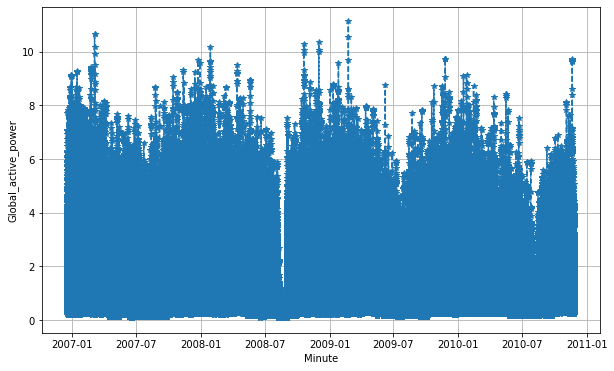

In [37]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(dat.index, dat.Global_active_power, '--' , marker= '*' , ) 
plt.grid()
plt.xlabel( 'Minute' )
plt.ylabel( 'Global_active_power' )

In [39]:
dat_day = dat.resample('D').sum()
dat_day.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [44]:
data.replace("?", "NaN", inplace =True)

Text(0, 0.5, 'Voltage ')

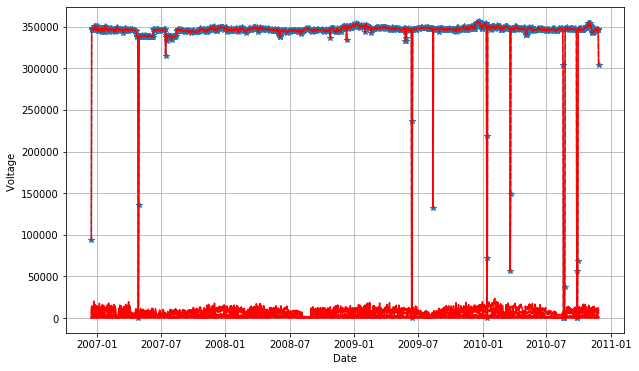

In [40]:
plt.figure(figsize=(10,6))
plt.plot(dat_day.index, dat_day.Voltage , '--',marker='*')
plt.plot(dat_day, 'red')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Voltage ')

In [45]:
dat.isnull().any()

Global_active_power      True
Global_reactive_power    True
Voltage                  True
Global_intensity         True
Sub_metering_1           True
Sub_metering_2           True
Sub_metering_3           True
dtype: bool

In [46]:
dat.fillna(method= 'ffill', inplace= True)

In [47]:
dat.isnull().any()

Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3           False
dtype: bool

C:\Users\user\Anaconda3\New conda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


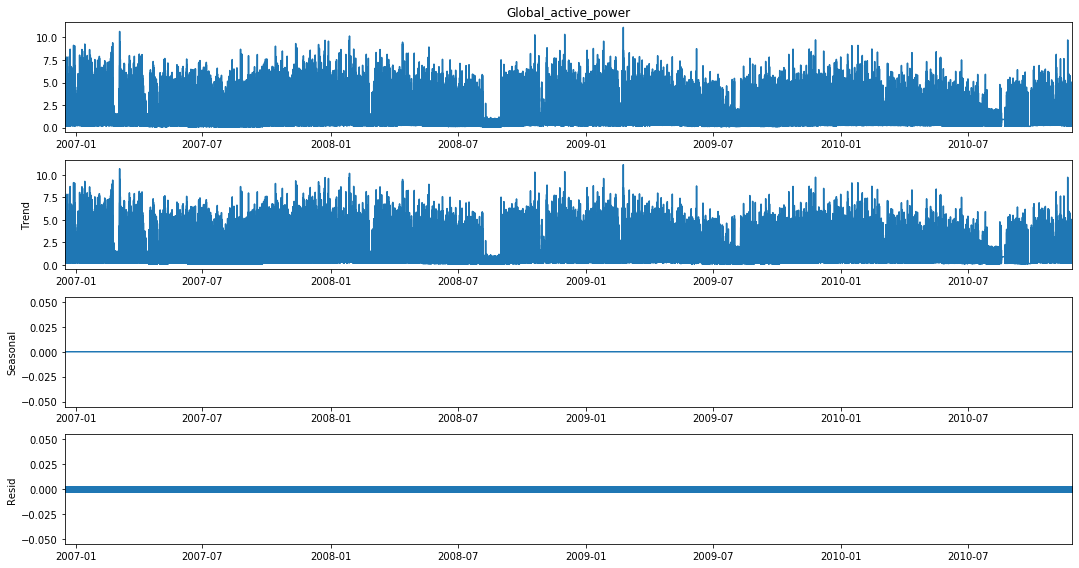

In [50]:
import statsmodels.api as sm
from pylab import rcParams

rcParams[ 'figure.figsize' ] = 15 , 8 
decompose_series = sm.tsa.seasonal_decompose(dat[ 'Global_active_power' ], model= 'additive',freq=(1) )
decompose_series.plot()
plt.show()

In [51]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(dat_day['Global_active_power'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -3.849776942163345
p-value: 0.0024371774298584344
No. of lags used: 22
No. of observations used : 1419
Critical Values:
   1%: -3.434966750462565
   5%: -2.8635789736973725
   10%: -2.5678555388041384


In [52]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


C:\Users\user\Anaconda3\New conda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


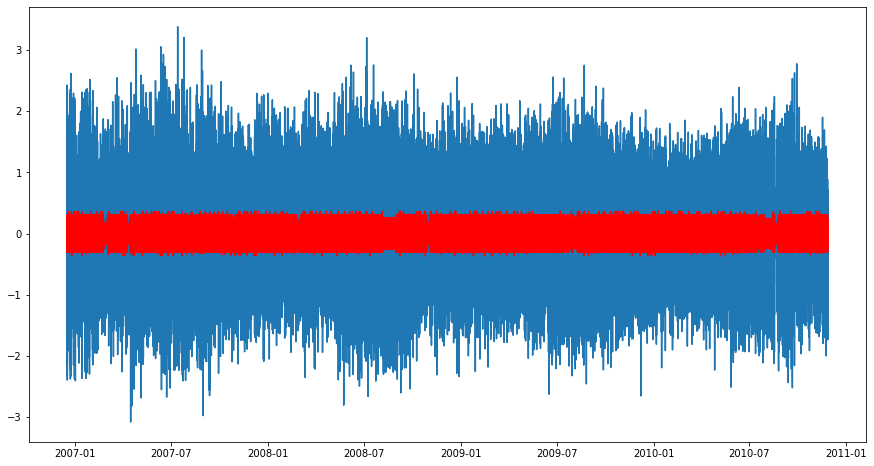

In [53]:
df_log = np.log(dat)
df_diff = df_log.diff(periods= 1 )
plt.plot(df_diff.index, df_diff.Global_active_power, '-' )
plt.plot(df_diff.rolling( 12 ).mean(), color= 'red' ) 

In [54]:
dat_day.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [55]:
dat_daily = dat_day.reset_index()

In [56]:
dat_daily.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [57]:
dat_daily_1 = dat_daily[['datetime','Global_active_power']]

dat_daily_2 = dat_daily_1.rename(columns={"datetime": "ds", "Global_active_power": "y"})

In [58]:
dat_daily_2.head()

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [59]:
model = Prophet()
model.fit(dat_daily_2)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\user\Anaconda3\New conda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [60]:
future = model.make_future_dataframe(periods= 10 , freq= 'D' )
forecast = model.predict(future)
forecast.head()
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]] 

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,2326.932015,1794.679131,2922.615940,1630.530970,1630.530970,1630.530970
1,2006-12-17,2312.597392,1751.613470,2885.919145,1630.406831,1630.406831,1630.406831
2,2006-12-18,2038.612022,1479.863403,2626.220383,1630.282692,1630.282692,1630.282692
3,2006-12-19,2160.875106,1630.561199,2716.627588,1630.158553,1630.158553,1630.158553
4,2006-12-20,2190.157709,1625.926634,2773.595702,1630.034413,1630.034413,1630.034413
...,...,...,...,...,...,...,...
1447,2010-12-02,1795.952105,1203.912874,2390.271414,1512.996478,1512.996478,1512.996478
1448,2010-12-03,1883.276803,1282.035176,2421.151832,1512.955530,1512.955530,1512.955530
1449,2010-12-04,2130.385778,1555.423386,2713.233945,1512.914582,1512.914582,1512.914582
1450,2010-12-05,2091.491495,1522.495532,2629.947746,1512.873634,1512.873634,1512.873634


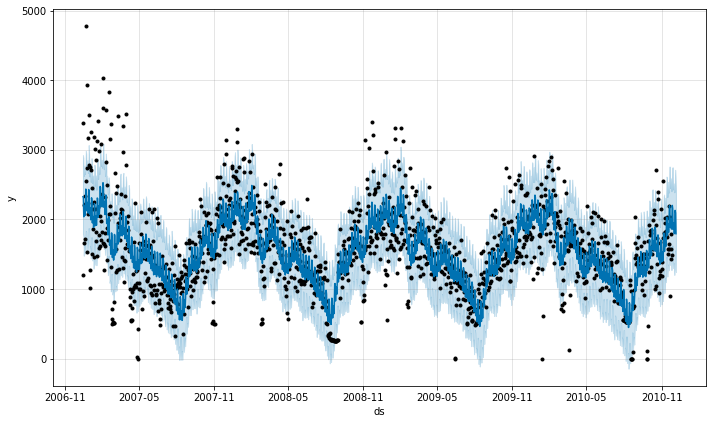

In [61]:
model.plot(forecast)
plt.show()

In [63]:
print(dat_daily_2.shape)
print(forecast.shape)

(1442, 2)
(1452, 19)


In [68]:
from scipy.stats import pearsonr
data1 = dat_daily[['Global_active_power']]
data2 = dat_daily[['Global_reactive_power']]
p = pearsonr(data1,data2)

print(p)

TypeError: No loop matching the specified signature and casting was found for ufunc add

In [69]:
dat_daily.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.128508,0.270671,0.999222,0.549166,0.485152,0.751204
Global_reactive_power,0.128508,1.000000,0.348427,0.150197,0.331805,0.199807,0.123274
Voltage,0.270671,0.348427,1.000000,0.274403,0.094364,0.080908,0.276219
Global_intensity,0.999222,0.150197,0.274403,1.000000,0.560965,0.493896,0.743731
Sub_metering_1,0.549166,0.331805,0.094364,0.560965,1.000000,0.257728,0.322270
Sub_metering_2,0.485152,0.199807,0.080908,0.493896,0.257728,1.000000,0.213210
Sub_metering_3,0.751204,0.123274,0.276219,0.743731,0.322270,0.213210,1.000000


In [70]:
dat_daily.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [71]:
len(dat_daily)

1442

In [72]:
1442 - 365


1077

In [83]:
train = dat_daily_2[:1077]
test = dat_daily_2[1077:]

In [84]:
len(train)

1077

In [85]:
len(test)

365

In [88]:
models = Prophet(daily_seasonality = True)
models.fit(train)

In [89]:
futures = models.make_future_dataframe(periods= 10 , freq= 'D' )
forecasts = model.predict(futures)
forecasts.head()
forecasts[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]] 

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,2326.932015,1764.520550,2896.574655,1630.530970,1630.530970,1630.530970
1,2006-12-17,2312.597392,1734.546309,2883.585904,1630.406831,1630.406831,1630.406831
2,2006-12-18,2038.612022,1468.799229,2605.904434,1630.282692,1630.282692,1630.282692
3,2006-12-19,2160.875106,1598.000544,2740.927529,1630.158553,1630.158553,1630.158553
4,2006-12-20,2190.157709,1666.356527,2774.465886,1630.034413,1630.034413,1630.034413
...,...,...,...,...,...,...,...
1082,2009-12-02,1954.290134,1391.771477,2518.615925,1527.942551,1527.942551,1527.942551
1083,2009-12-03,1798.815932,1214.735886,2334.256134,1527.901603,1527.901603,1527.901603
1084,2009-12-04,1887.971343,1272.661665,2440.083570,1527.860654,1527.860654,1527.860654
1085,2009-12-05,2137.408264,1546.486163,2669.072378,1527.819706,1527.819706,1527.819706


In [ ]:
models = Prophet(daily_seasonality = True)
models.fit(test)

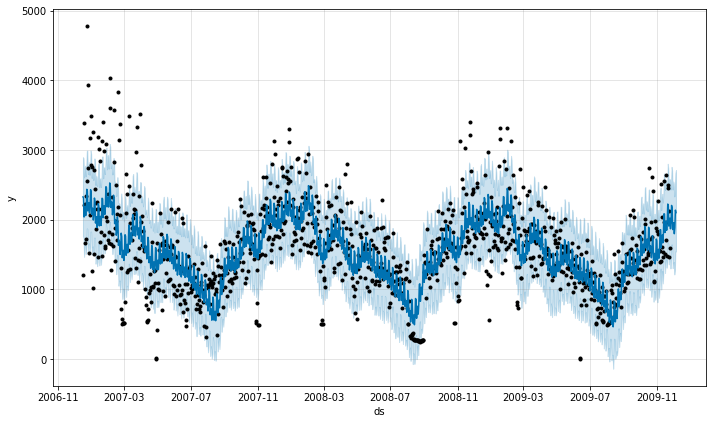

In [90]:
models.plot(forecasts)
plt.show()